# Predicting Logerror For Our Zillow Database
### Braeden Wright | Junior Data Scientist | April 8, 2022
-----------

## Project Goal

   - Find the key drivers of property value for single family properties and construct an ML Regression model that will predict property tax assessed values (tax_value) for those homes.

## Initial Questions

    
   - Is there a relationship between logerror and age?
   - Does the county(fips) influence the logerror?
   - Does size of the property infuence the logerror?
   - Can taxamount or taxvaluedollarcnt be used to calculate logerror?


## Data Dictionary
Feature -----> Discription


    'airconditioningtypeid'	---> Type of cooling system present in the home (if any)
    'architecturalstyletypeid' --->	 Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
    'basementsqft'	---> Finished living area below or partially below ground level
    'bathroomcnt'	---> Number of bathrooms in home including fractional bathrooms
    'bedroomcnt'	---> Number of bedrooms in home 
    'buildingqualitytypeid'	---> Overall assessment of condition of the building from best (lowest) to worst (highest)
    'buildingclasstypeid'	---> The building framing type (steel frame, wood frame, concrete/brick) 
    'calculatedbathnbr'	---> Number of bathrooms in home including fractional bathroom
    'decktypeid'	---> Type of deck (if any) present on parcel
    'threequarterbathnbr'	---> Number of 3/4 bathrooms in house (shower + sink + toilet)
    'finishedfloor1squarefeet'	---> Size of the finished living area on the first (entry) floor of the home
    'calculatedfinishedsquarefeet'	---> Calculated total finished living area of the home 
    'finishedsquarefeet6'	---> Base unfinished and finished area
    'finishedsquarefeet12'	---> Finished living area
    'finishedsquarefeet13'	---> Perimeter  living area
    'finishedsquarefeet15'	---> Total area
    'finishedsquarefeet50'	---> Size of the finished living area on the first (entry) floor of the home
    'fips'	---> Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details
    'fireplacecnt'	---> Number of fireplaces in a home (if any)
    'fireplaceflag'	 ---> Is a fireplace present in this home 
    'fullbathcnt'	---> Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
    'garagecarcnt'	---> Total number of garages on the lot including an attached garage
    'garagetotalsqft'	---> Total number of square feet of all garages on lot including an attached garage
    'hashottuborspa'	---> Does the home have a hot tub or spa
    'heatingorsystemtypeid'	 ---> Type of home heating system
    'latitude'	---> Latitude of the middle of the parcel multiplied by 10e6
    'longitude'	---> Longitude of the middle of the parcel multiplied by 10e6
    'lotsizesquarefeet'	--> Area of the lot in square feet
    'numberofstories'	---> Number of stories or levels the home has
    'parcelid'	 ---> Unique identifier for parcels (lots) 
    'poolcnt'	--> Number of pools on the lot (if any)
    'poolsizesum'	---> Total square footage of all pools on property
    'pooltypeid10'	---> Spa or Hot Tub
    'pooltypeid2'	---> Pool with Spa/Hot Tub
    'pooltypeid7'	---> Pool without hot tub
    'propertycountylandusecode'	---> County land use code i.e. it's zoning at the county level
    'propertylandusetypeid'	---> Type of land use the property is zoned for
    'propertyzoningdesc'	---> Description of the allowed land uses (zoning) for that property
    'rawcensustractandblock'	---> Census tract and block ID combined - also contains blockgroup assignment by extension
    'censustractandblock'	---> Census tract and block ID combined - also contains blockgroup assignment by extension
    'regionidcounty'   ---> County in which the property is located
    'regionidcity'	---> City in which the property is located (if any)
    'regionidzip'	---> Zip code in which the property is located
    'regionidneighborhood'  ---> Neighborhood in which the property is located
    'roomcnt'	---> Total number of rooms in the principal residence
    'storytypeid'	---> Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.
    'typeconstructiontypeid'	---> What type of construction material was used to construct the home
    'unitcnt'	---> Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
    'yardbuildingsqft17'	---> Patio in  yard
    'yardbuildingsqft26'	---> Storage shed/building in yard
    'yearbuilt'	 ---> The Year the principal residence was built 
    'taxvaluedollarcnt' ---> The total tax assessed value of the parcel
    'structuretaxvaluedollarcnt'	---> The assessed value of the built structure on the parcel
    'landtaxvaluedollarcnt' ---> The assessed value of the land area of the parcel
    'taxamount'	---> The total property tax assessed for that assessment year
    'assessmentyear'	---> The year of the property tax assessment 
    'taxdelinquencyflag'	---> Property taxes for this parcel are past due as of 2015
    'taxdelinquencyyear'	---> Year for which the unpaid propert taxes were due 
    


-------
# Import Menagerie

In [2]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Custom
import env
import wrangle_prep as wp

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Downloading the dataframe, almost all data prep/cleaning is hadled already.  This process includes:
- Determining which variables from the data had too much missing information to be useful (50%+ missing info for columns, 70%+ missing info for rows).
- Pinpointing any outliers that could negatively skew our data/ model.
- Making sure that data is the right type for visualizing/ modeling.
- Remove any duplicate information from the ID column.
- Verify's that we are only working on properties that are single family properties.

### There are a few other thing we will change below

In [3]:
df = wp.wrangle_zillow()
df.head(1)

Saving to .csv


,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01


## A small bit of Feature Engineering, then Split the Data, and set up other variables
- Create a column containing absolute value
- Create a column with the age of properties

In [4]:
# first with the addition of an absolute value column
df['abs_logerror'] = abs(df.logerror)

# second property age, which helps with visualization
df.yearbuilt = df.yearbuilt.astype(int)
df['age'] = 2017 - df.yearbuilt
df.yearbuilt = df.yearbuilt.astype(object)

df.head(4)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,abs_logerror,county,age
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,0.025595,Orange County,19
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,0.055619,Ventura County,50
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,0.005383,Orange County,55


In [5]:
# train, validate, test split
train, validate, test = wp.split_data(df)

train <> (38066, 25)
validate <> (16315, 25)
test <> (13596, 25)


In [6]:
# Data for modeling
x_train = train.drop(columns=['logerror'])
y_train = train.logerror

x_validate = validate.drop(columns=['logerror'])
y_validate = validate.logerror

x_test = test.drop(columns=['logerror'])
y_test = test.logerror

# Scaling
x_train_scaled, x_validate_scaled, x_test_scaled = wp.scale_data(x_train, x_validate, x_test)

train_scaled <> (38066, 24)
validate_scaled <> (16315, 24)
test_scaled <> (13596, 24)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67977 entries, 0 to 77573
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      67977 non-null  int64  
 1   bathroomcnt                   67977 non-null  float64
 2   bedroomcnt                    67977 non-null  float64
 3   buildingqualitytypeid         67977 non-null  float64
 4   calculatedfinishedsquarefeet  67977 non-null  float64
 5   fips                          67977 non-null  float64
 6   latitude                      67977 non-null  float64
 7   longitude                     67977 non-null  float64
 8   lotsizesquarefeet             67977 non-null  float64
 9   rawcensustractandblock        67977 non-null  float64
 10  regionidcity                  67977 non-null  float64
 11  regionidcounty                67977 non-null  float64
 12  regionidzip                   67977 non-null  float64
 13  r

# Exploration
### Univariate

In [8]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,abs_logerror,age
count,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,6.797700e+04,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000,6.797700e+04,6.797700e+04,67977.0,6.797700e+04,67977.000000,67977.000000,67977.000000,67977.000000
mean,1.301859e+07,2.202208,2.979361,6.314400,1675.335643,6049.441002,3.400452e+07,-1.181922e+08,2.785835e+04,6.049738e+07,33629.109905,2497.538903,96599.725907,1.602057,1.633991e+05,4.128805e+05,2016.0,2.494814e+05,5062.504630,0.016567,0.066315,48.171514
std,2.138710e+06,0.841592,0.980254,1.316425,764.510956,20.981742,2.689044e+05,3.618898e+05,1.204185e+05,2.082548e+05,46958.881196,814.755364,3314.077112,2.907933,1.267090e+05,3.029315e+05,0.0,2.225690e+05,3494.811018,0.164081,0.150995,22.792962
min,1.071186e+07,0.000000,0.000000,1.000000,128.000000,6037.000000,3.333953e+07,-1.194753e+08,2.360000e+02,6.037101e+07,3491.000000,1286.000000,95982.000000,0.000000,4.400000e+01,3.254000e+03,2016.0,1.610000e+02,19.920000,-4.655420,0.000002,1.000000
25%,1.153706e+07,2.000000,2.000000,6.000000,1156.000000,6037.000000,3.380559e+07,-1.184068e+08,6.000000e+03,6.037400e+07,12447.000000,1286.000000,96212.000000,0.000000,8.177700e+04,1.986290e+05,2016.0,7.919000e+04,2620.300000,-0.023628,0.013397,31.000000
50%,1.260270e+07,2.000000,3.000000,6.000000,1488.000000,6037.000000,3.401119e+07,-1.181600e+08,7.313000e+03,6.037621e+07,25218.000000,3101.000000,96412.000000,0.000000,1.309070e+05,3.466180e+05,2016.0,1.960000e+05,4277.300000,0.006325,0.030823,47.000000
75%,1.426033e+07,3.000000,4.000000,7.000000,1996.000000,6059.000000,3.417698e+07,-1.179139e+08,1.044100e+04,6.059052e+07,45457.000000,3101.000000,96993.000000,0.000000,2.048630e+05,5.389580e+05,2016.0,3.492460e+05,6506.950000,0.037433,0.064689,63.000000
max,1.629608e+08,10.000000,11.000000,12.000000,8251.000000,6111.000000,3.481877e+07,-1.175723e+08,6.971010e+06,6.111009e+07,396556.000000,3101.000000,399675.000000,14.000000,1.646927e+06,2.090230e+06,2016.0,1.786325e+06,19997.540000,3.394544,4.655420,139.000000


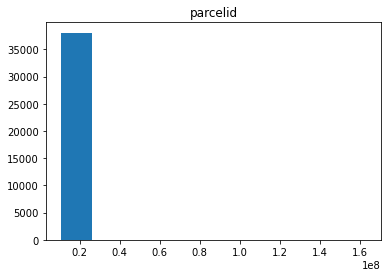

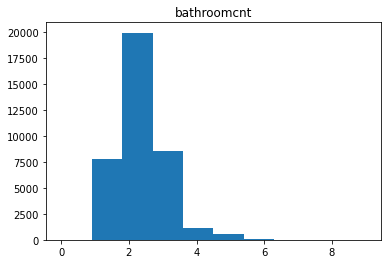

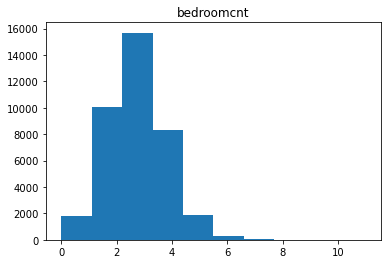

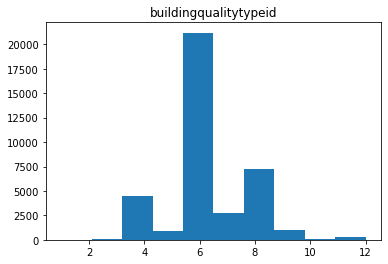

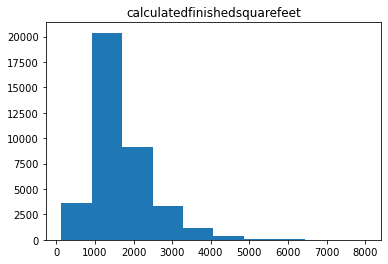

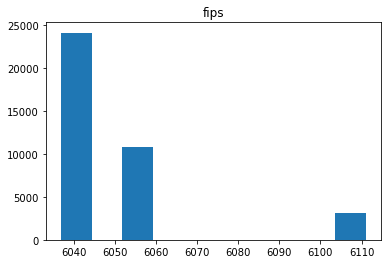

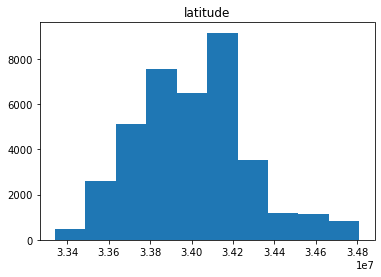

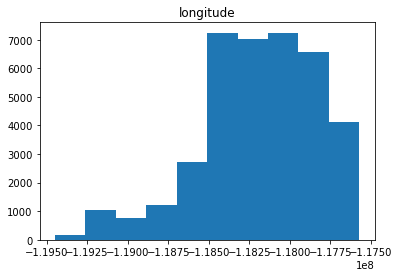

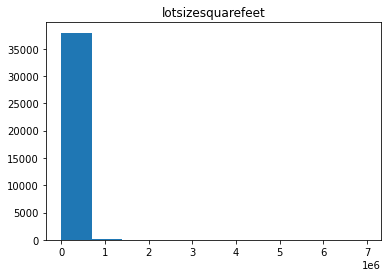

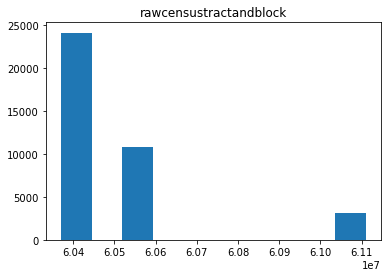

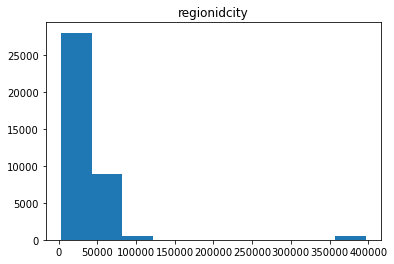

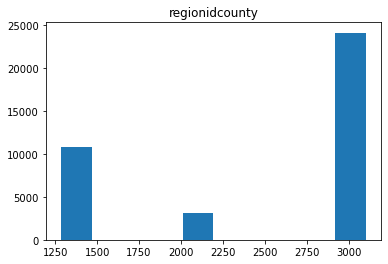

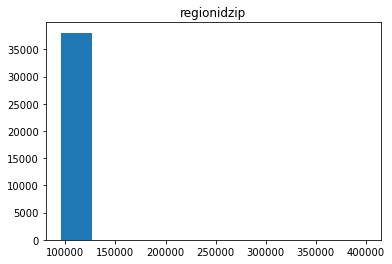

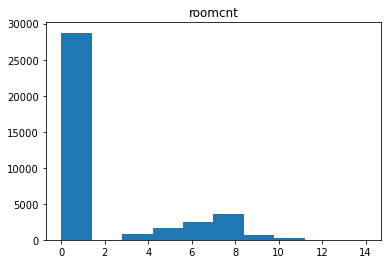

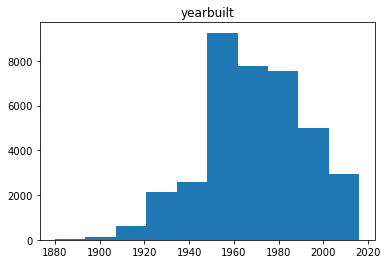

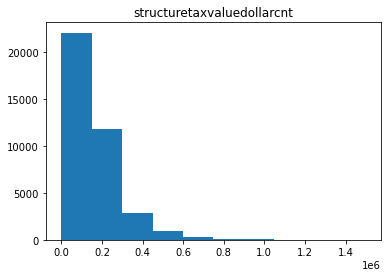

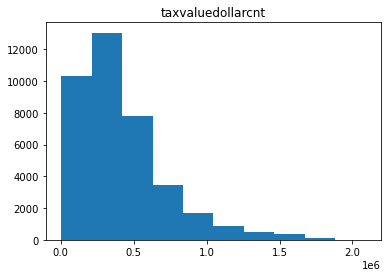

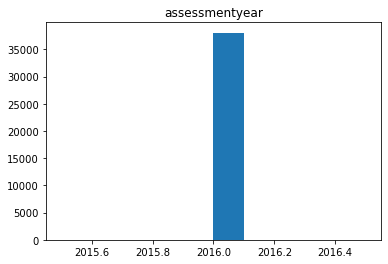

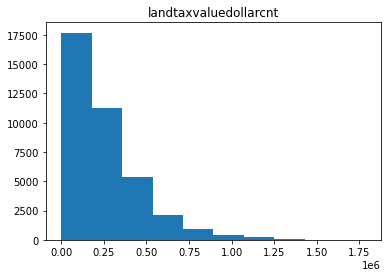

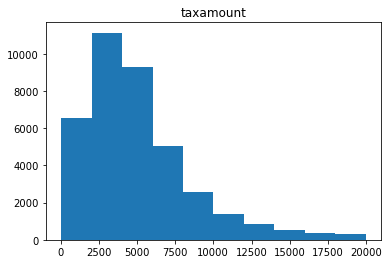

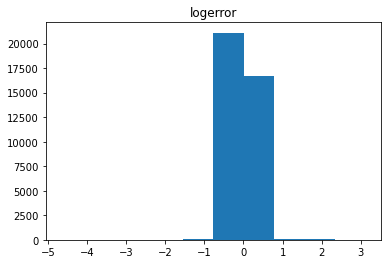

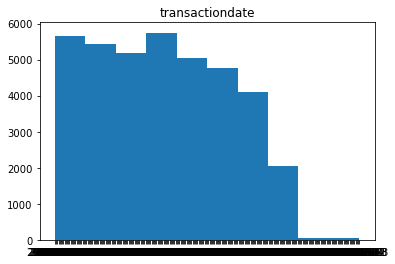

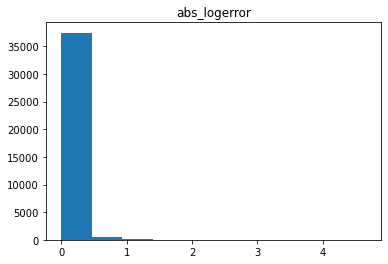

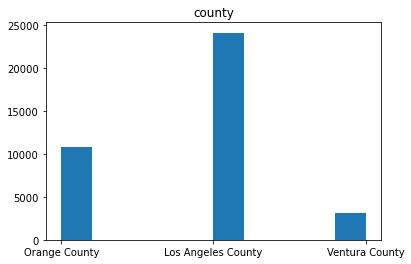

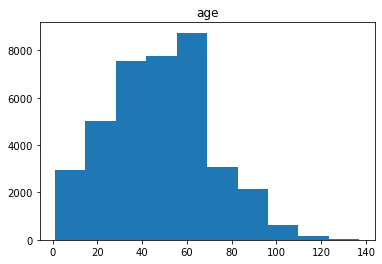

In [9]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

## Takeaways
- Mostly normal distribution among features
-------
# Bivariate and Multivariate Exploration
- Only looking at features that will give meaningful visualizations on logerror
- First only looking at the feature by logerror
- Second group of visuals compares those graphs with fips (county)
- Last group of graphs compare feature by logerror and group by yearbuilt

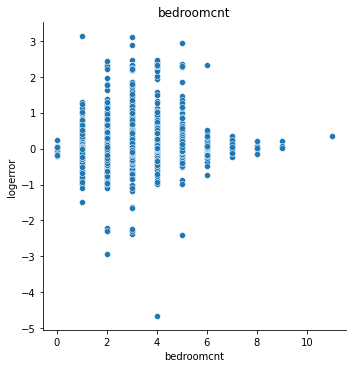

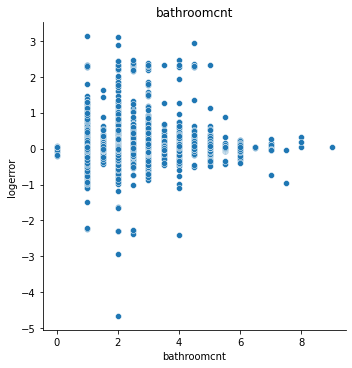

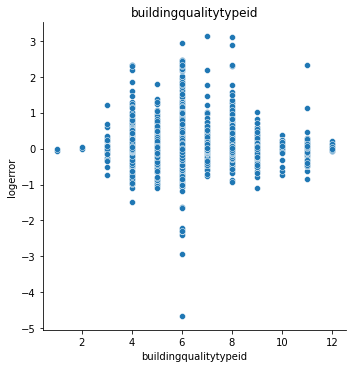

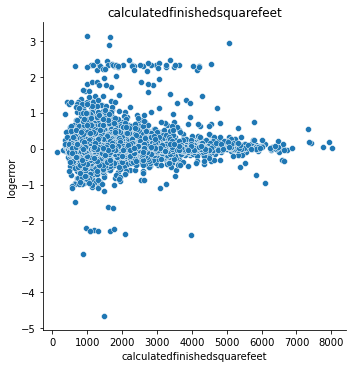

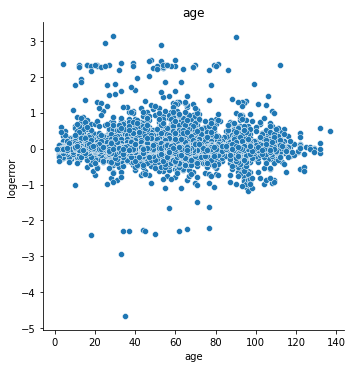

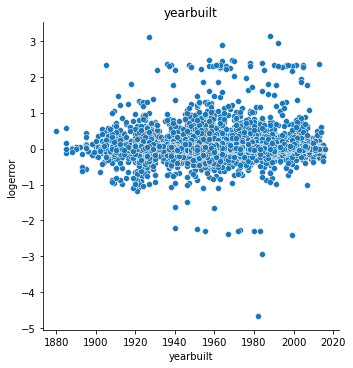

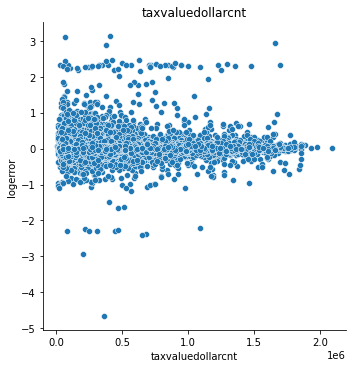

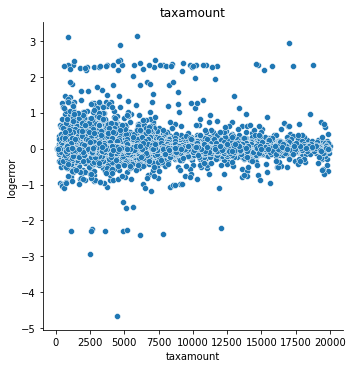

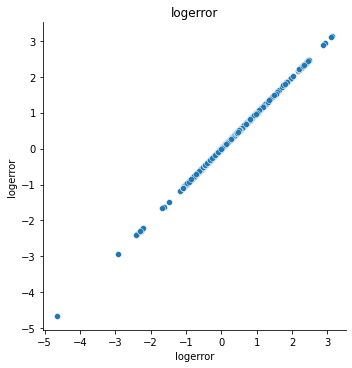

In [10]:
exp_columns = ['bedroomcnt', 'bathroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'age', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']

for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror)
    plt.title(col)
    plt.show()

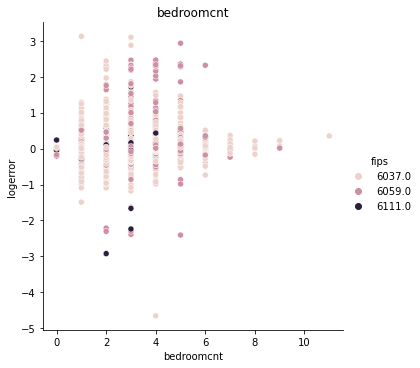

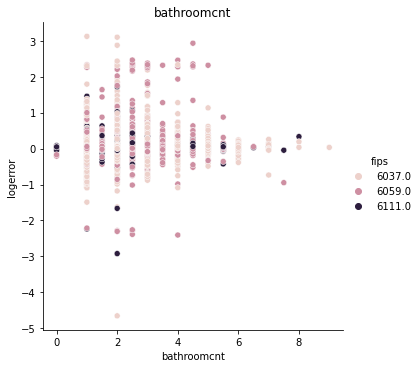

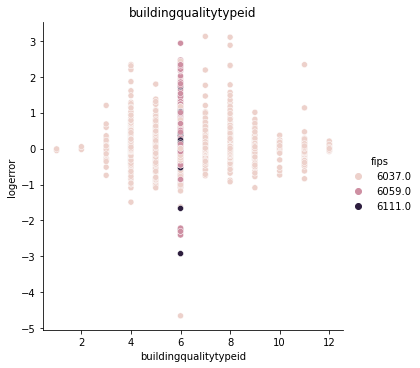

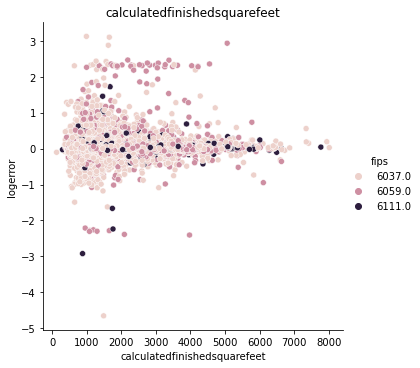

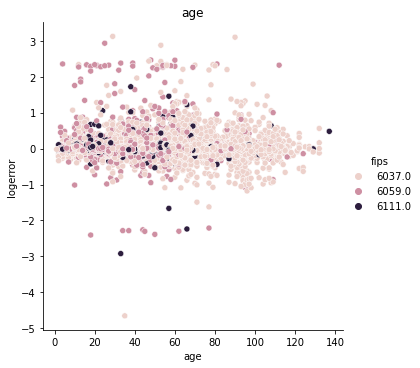

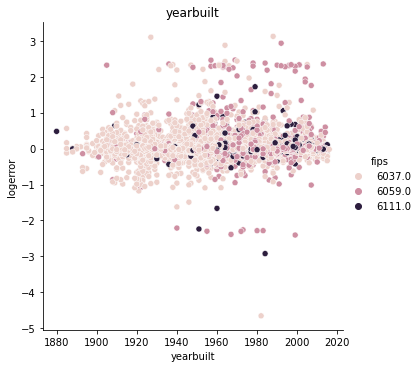

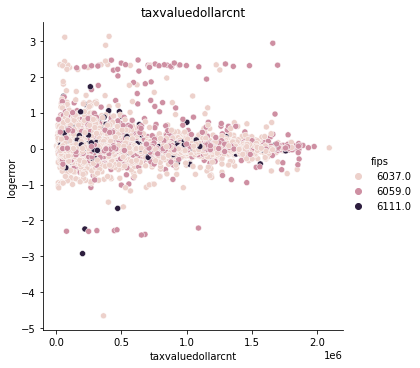

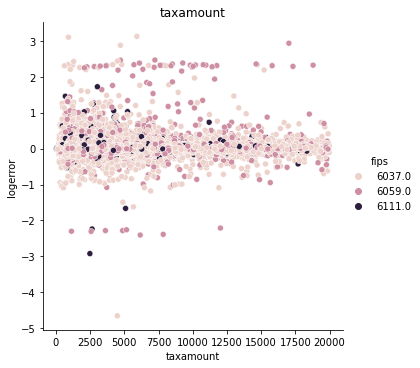

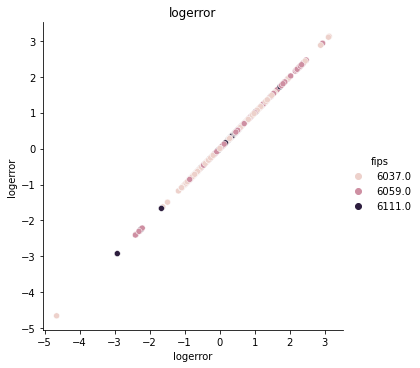

In [12]:
for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.fips)
    plt.title(col)
    plt.show()

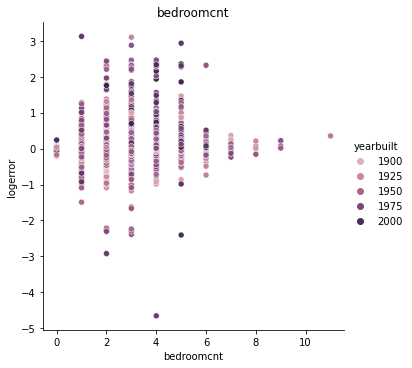

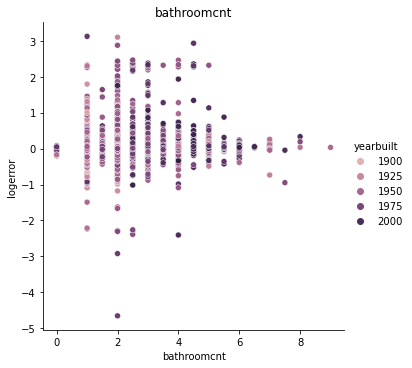

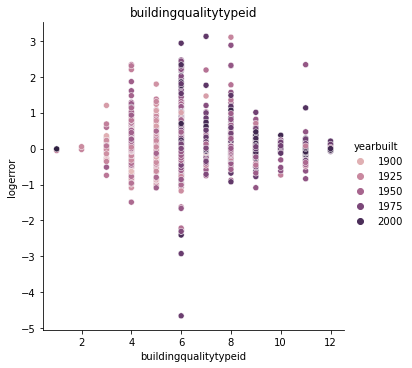

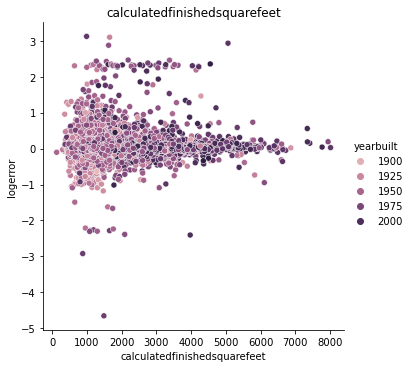

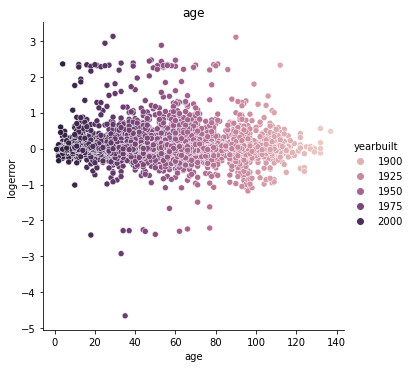

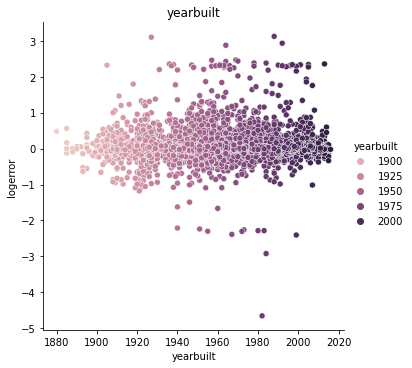

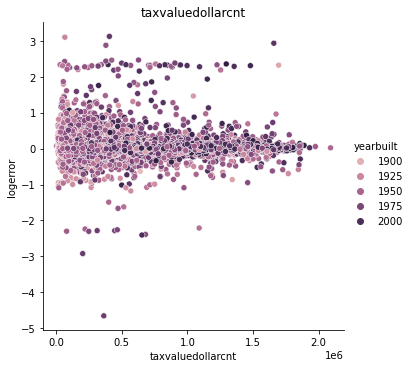

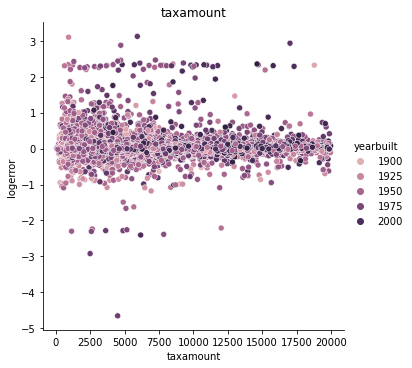

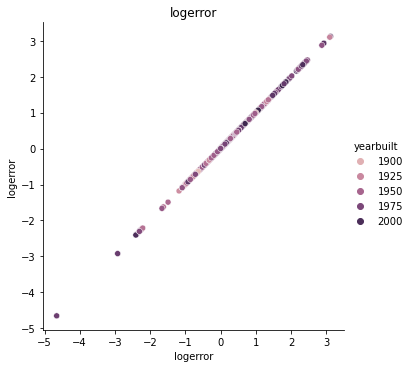

In [13]:
for col in train[exp_columns]:
    sns.relplot(x=train[col], y=train.logerror, hue=train.yearbuilt)
    plt.title(col)
    plt.show()

### For good measure I'll check for any correrlation with a heatmap

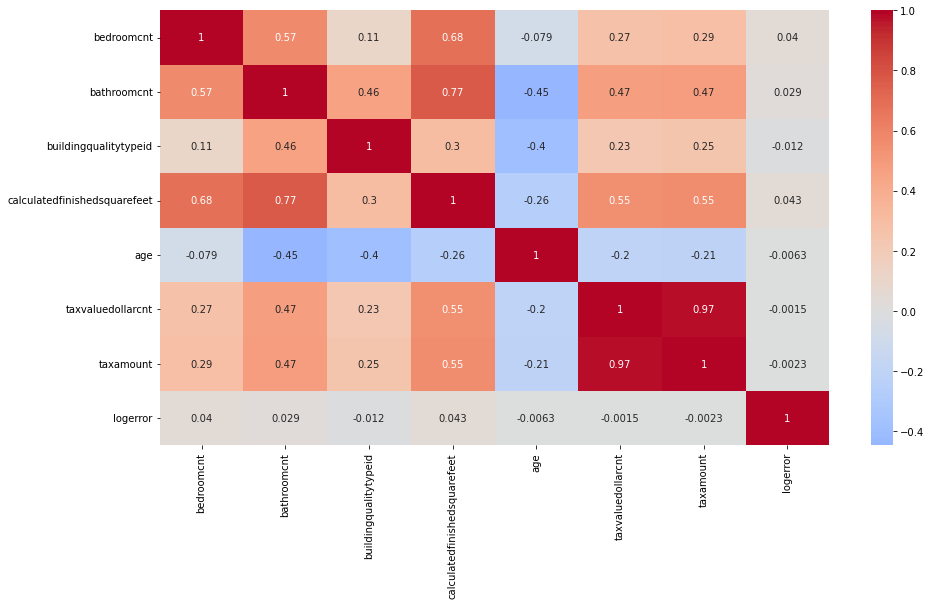

In [14]:
# Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(train[exp_columns].corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

# Takaways
- Newer homes tend to have higher logerror than older homes
- Higher taxamounts seem to have lower rates of logerror
- Might be worth breaking up homes by age
- LA county (fips 6037) was the only county to track buildingqualitytypeid
- Refrencing the heatmap, calulatedfinishedsquarefeet was the feature that showed the most impact on log error
---------
## Questions to explore and verify:
- Is there a relationship between logerror and age?
- Does the county(fips) influence the logerror?
- Does size of the property infuence the logerror?
- Can taxamount or taxvaluedollarcnt be used to calculate logerror?
----
### Question 1 
#### Is there a relationship between logerror and age?
- Visualize Log Error by Year Built
- Test for correlation and explore any insights

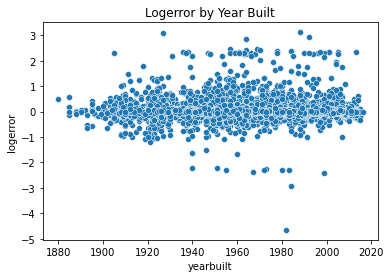

In [15]:
sns.scatterplot(data=train, y='logerror', x='yearbuilt')
plt.title('Logerror by Year Built')
plt.show()

In [16]:
stats.ttest_ind(train.yearbuilt, train.logerror,
                equal_var=True)

Ttest_indResult(statistic=16819.059485896098, pvalue=0.0)

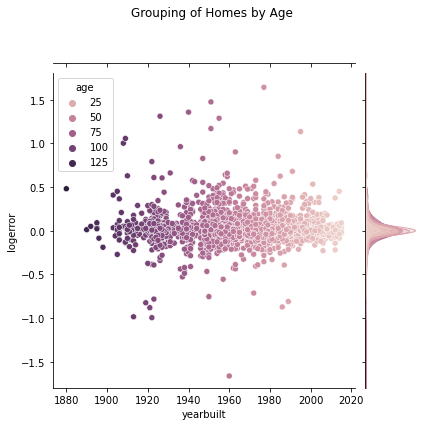

In [17]:
# logerror seems to be better before the 1950's

sample = train.sample(5000)

sns.jointplot('yearbuilt', 'logerror', data=sample, kind='scatter', hue='age', ylim=(-1.8, 1.8))
plt.suptitle('Grouping of Homes by Age')

plt.show()